[  0 210] [0. 1.]


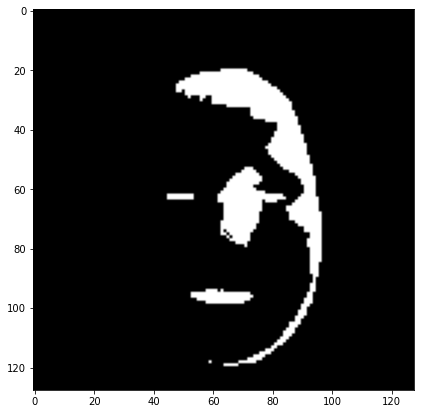

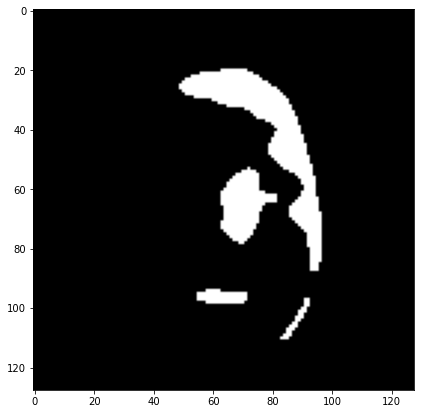

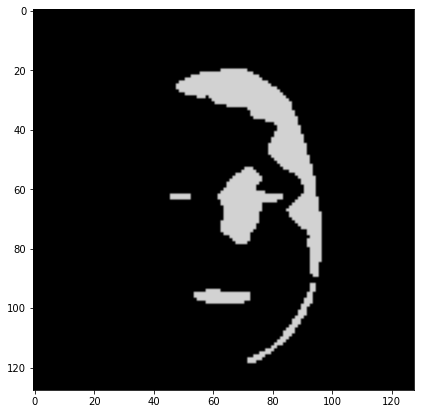

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


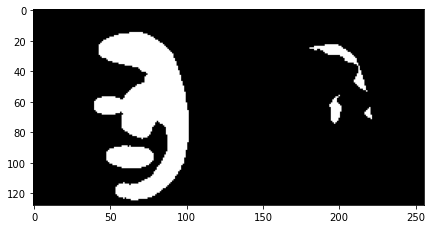

In [39]:
import numpy as np
import skimage.morphology
import torch as th
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import cv2
import skimage

path = '/data/mint/sampling/TPAMI/cast_shadows_results/log%3DDiFaReli_FsBg_Sdiff_SS_128_VLL_cfg%3DDiFaReli_FsBg_Sdiff_SS_128_VLL.yaml_inv_with_sd_rotateSH_axis2_smoothFL_reshadow/ema_100000/valid/render_face/reverse_sampling/src%3D60351.jpg/dst%3D60000.jpg/Lerp_1000/n_frames%3D60/shadm_shad_frame55.png'
path = path.replace("%3D", "=")
img_pil = Image.open(path)
img = np.array(img_pil)
sd_mask = (img > 0)*1.0
print(np.unique(img), np.unique(sd_mask))

s = 7
plt.figure(figsize=(s, s))
plt.imshow(sd_mask)
plt.show()

img_post = cv2.medianBlur((sd_mask*255).astype(np.uint8), 5)
plt.figure(figsize=(s, s))
plt.imshow(img_post)

img_post = img_pil.filter(ImageFilter.ModeFilter(3))
plt.figure(figsize=(s, s))
plt.imshow(img_post)
plt.show()

dilation_size = 5
dilate_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * dilation_size + 1, 2 * dilation_size + 1),
                                (dilation_size, dilation_size))

erosion_size = 3
erode_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * erosion_size + 1, 2 * erosion_size + 1),
                                (erosion_size, erosion_size))
# img_post = cv2.erode(sd_mask, element)
img_post_dilate = cv2.dilate(sd_mask, dilate_element)
img_post_erode = cv2.erode(sd_mask, erode_element)

plt.figure(figsize=(s, s))
plt.imshow(np.concatenate((img_post_dilate, img_post_erode), axis=1) * 255)
plt.show()